# 1 - Introduction 

In this Data Analytics work, we will explore the power of hypothesis testing, a fundamental technique of inferential statistics that allows us to make inferences about a population based on a sample of data. Hypothesis tests provide a structured framework for assessing the validity of claims about population parameters such as means, proportions, and variances. Throughout the analysis, we will delve into different types of hypothesis tests, such as the Z-test, t-test, ANOVA, and chi-square test, and discuss their applications in various scenarios. Over the course of this work, we will emphasize the importance of understanding hypothesis tests and their role in data analysis for the advancement of knowledge.

Iremos aplicar os testes de hipotesis em 4 bases de dados, para cada base de dados iremos contextualizar e incluir a conclusao. 








# Import Libraries 

Importando as bibliotecas que serão utilizadas durante o desenvolvimento do projeto

In [111]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.image as plt
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import statistics

# 2 - Task 1 - Exam score

Iremos explorar os dados e realizar Teste de hipotesis utilizando a base de dados "Q1" que contém as notas (em porcentagens) de uma amostra de 50 alunos de uma escola secundária em Dublin. O intuito do teste de hipotesis é avaliar se o desempenho dos alunos dessa escola está abaixo da media nacional que é 70%. 

# 2.1 - Loading the file

In [112]:
df=pd.read_csv("Q1.csv")

# 2.2 - Characterisation of the data set

I will perform data characterization in Python to understand the essential characteristics of the data, such as examining the dimensions of the dataset, identifying types of variables present, exploring statistics, among others. The analyses conducted will be detailed below.

In [113]:
df.head ()

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43


In [114]:
df.shape

(50, 1)

Essa base de dados contem apenas uma coluna com 50 linhas

In [115]:
df.describe ()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


a media das notas dos alunos estao em 68,73 com desvio padrão de 9.75

In [116]:
df.mean()

exam_score    68.7356
dtype: float64

In [117]:
df.median()

exam_score    68.39
dtype: float64

# 2.3 - Data Exploration 

C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_5736\751998997.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df['exam_score'], shade=True)


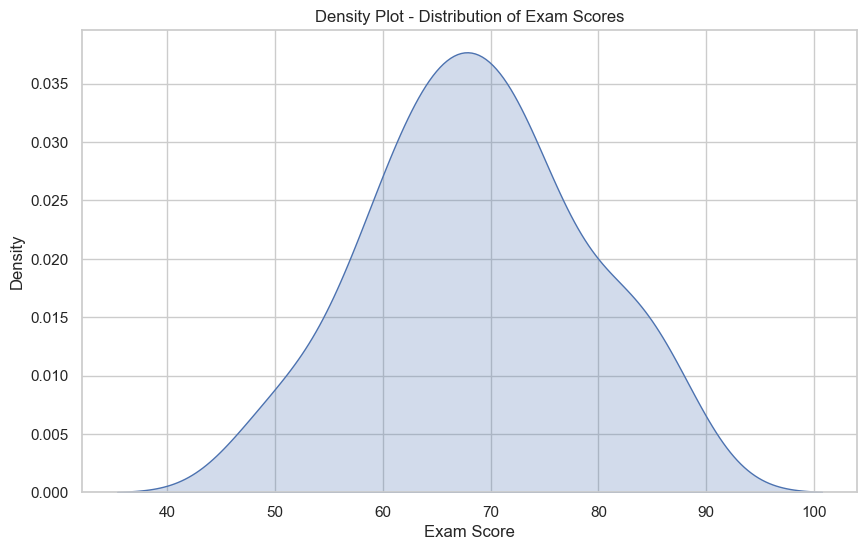

In [118]:
# Setting the style of the plot
sns.set(style="whitegrid")

# Creating the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df['exam_score'], shade=True)
plt.title('Density Plot - Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Density')
plt.show()

Pelo grafico de densidade o que podemos observar: 

Concentração de Notas: Podemos observar que a maioria das notas está concentrada em torno de uma faixa específica, indicada pela região mais alta da curva de densidade.

Distribuição Simétrica: A curva de densidade parece seguir uma distribuição simétrica, o que sugere que a maioria dos alunos obteve notas medianas.

Notas Extremas: No entanto, também podemos observar que há uma cauda mais longa em direção às notas mais altas, indicando que alguns alunos tiveram desempenho excepcionalmente bom.

Variação nas Notas: A densidade das notas diminui gradualmente à medida que nos afastamos da faixa central, indicando uma variação na distribuição das notas.

Portanto, com base nesses dados, podemos concluir que a maioria dos alunos obteve notas medianas, mas também houve casos de desempenho excepcional tanto para cima quanto para baixo.

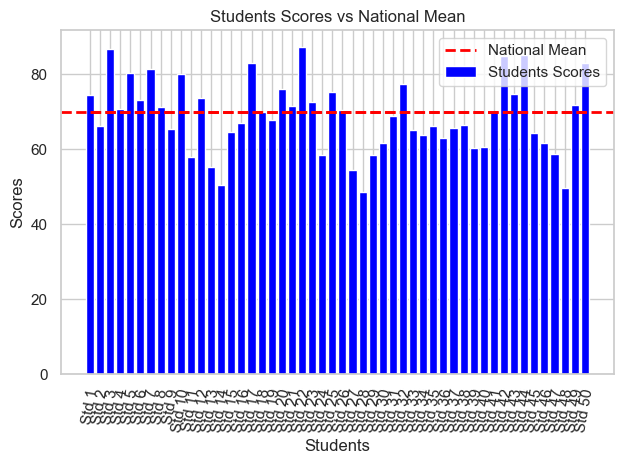

In [119]:
# Sample mean
sample_mean = df['exam_score'].mean()

# Define the national mean
national_mean = 70

# Create a list of labels for the students
students = ['Std {}'.format(i+1) for i in range(len(df))]

# Create a list of students' scores
students_scores = df['exam_score']

# Create a list with the national mean repeated for each student
national_scores = [national_mean] * len(df)

# Create the bar chart
plt.bar(students, students_scores, color='blue', label='Students Scores')
plt.plot(students, national_scores, color='red', linestyle='dashed', linewidth=2, label='National Mean')

# Add a horizontal line for the national mean
plt.axhline(y=national_mean, color='red', linestyle='dashed', linewidth=2)

# Add legends and axis labels
plt.xlabel('Students')
plt.ylabel('Scores')
plt.title('Students Scores vs National Mean')
plt.legend()

# Display the plot
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


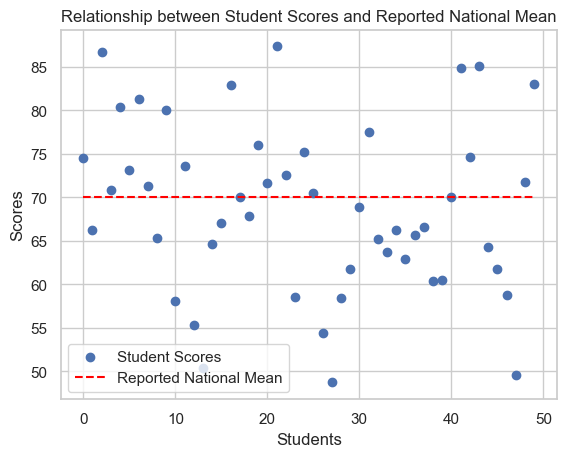

In [120]:
import matplotlib.pyplot as plt

# Student exam scores and reported national mean
student_scores_school = df['exam_score']
reported_national_mean = 70

# Create scatter plot
plt.scatter(range(len(student_scores_school)), student_scores_school, label='Student Scores')
plt.plot(range(len(student_scores_school)), [reported_national_mean]*len(student_scores_school), 
         color='red', linestyle='--', label='Reported National Mean')

# Add title and axis labels
plt.title('Relationship between Student Scores and Reported National Mean')
plt.xlabel('Students')
plt.ylabel('Scores')
plt.legend()
plt.show()


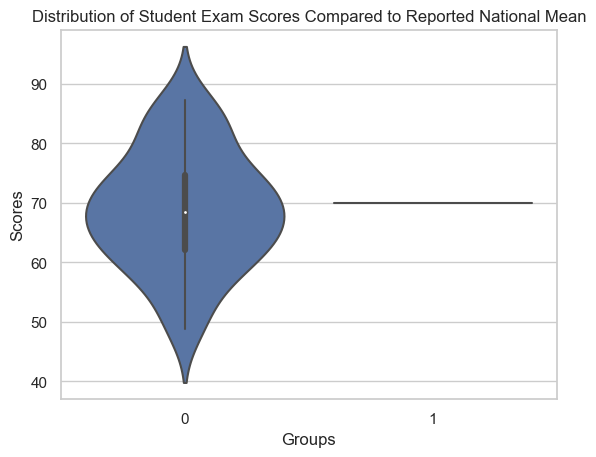

In [121]:
# Data of exam scores for the students and reported national average
student_exam_scores = df['exam_score']
national_mean_reported = 70

# Create a violin plot
sns.violinplot(data=[student_exam_scores, [national_mean_reported]*len(student_exam_scores)], 
               names=['Student Exam Scores', 'Reported National Mean'])

# Add title and axis labels
plt.title('Distribution of Student Exam Scores Compared to Reported National Mean')
plt.xlabel('Groups')
plt.ylabel('Scores')
plt.show()


# 2.4 Outliers

<Axes: xlabel='exam_score'>

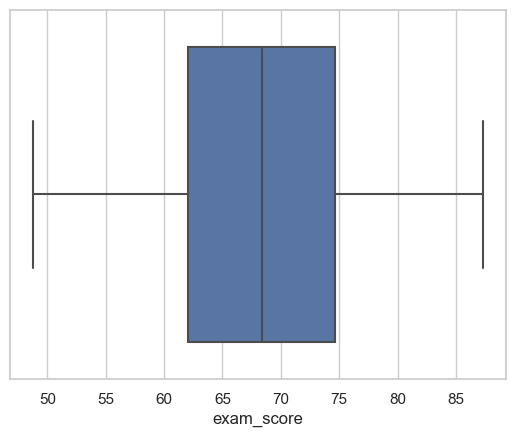

In [122]:
sns.boxplot(x=df["exam_score"])

Não há outliers para avaliarmos a remocao 

# 2.5 - Hypothesis Testing

Contextualizando o problema: Estamos trabalhando com um dataset que contem uma amostra do desempenho dos alunos (50 alunos) de uma escola de Dublin. Considerando esse contexto, uma das professoras está preocupada com o desempenho dos alunos na escola. Ela 
suspeita que seu desempenho pode estar abaixo da média nacional relatada de 70%. o intuito desse teste de hipotesis sera avaliar se as preocupacoes da professora são justificadas. Para realizar o teste usaremos:  

nível de significância de alfa = 0,05

Sample mean = media dos alunos da escola 

population mean = media dos alunos nacional



In [123]:
from scipy import stats 

# The one sample t-test model is ttest_1samp which takes in the sample mean 
stats.ttest_1samp(df['exam_score'], popmean = 70)

TtestResult(statistic=-0.9169771399834613, pvalue=0.36364597032062806, df=49)

In [124]:
import math

resultado_scipy = stats.ttest_1samp(df['exam_score'], popmean=70)  # Alteração do popmean para 70
print("Resultado do teste t usando scipy.stats:", resultado_scipy)

# Para realizar o cálculo manualmente:
xbar = df['exam_score'].mean()  # Média da amostra
mu = 70  # Média esperada alterada para 70
s = statistics.stdev(df['exam_score'])  # Desvio padrão da amostra
n = len(df['exam_score'])  # Tamanho da amostra

test_statistic = (xbar - mu) / (s / math.sqrt(n))
print("Test Statistic (Cálculo manual):", test_statistic)

Resultado do teste t usando scipy.stats: TtestResult(statistic=-0.9169771399834613, pvalue=0.36364597032062806, df=49)
Test Statistic (Cálculo manual): -0.9169771399834615


In [125]:
sample_mean = df['exam_score'].mean()

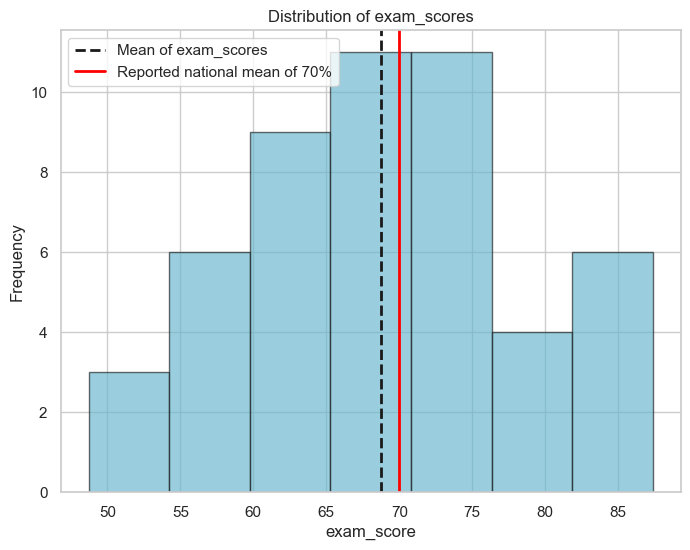

Result of t-test using scipy.stats: TtestResult(statistic=-0.9169771399834613, pvalue=0.36364597032062806, df=49)


In [126]:


# Mean of exam_scores
media_exam_scores = df['exam_score'].mean()

# Create the plot
plt.figure(figsize=(8, 6))
result = plt.hist(df['exam_score'], bins=7, color="c", edgecolor="k", alpha=0.65)

# Add line for the mean of exam_scores
plt.axvline(media_exam_scores, color="k", linestyle="dashed", linewidth=2, label="Mean of exam_scores")

# Add line for the reported national mean of 70%
plt.axvline(70, color="red", linestyle="solid", linewidth=2, label="Reported national mean of 70%")

plt.title('Distribution of exam_scores')
plt.xlabel('exam_score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display the result of the t-test
print("Result of t-test using scipy.stats:", resultado_scipy)

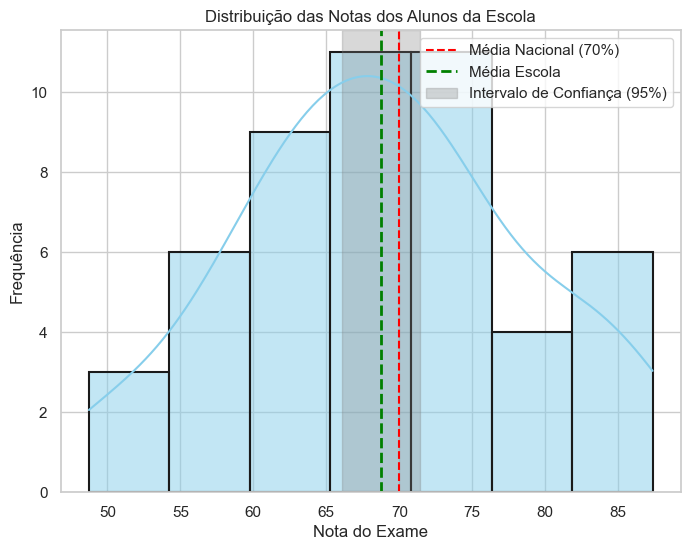

In [127]:
# Notas dos alunos da escola (exemplo)
student_exam_scores = df['exam_score']

# Média e desvio padrão das notas dos alunos da escola
mean_school = np.mean(student_exam_scores)
std_school = np.std(student_exam_scores)

# Média nacional relatada
mean_national = 70

# Intervalo de confiança para a média das notas dos alunos da escola
ci = stats.norm.interval(0.95, loc=mean_school, scale=std_school/np.sqrt(len(student_exam_scores)))

# Criar o gráfico
plt.figure(figsize=(8, 6))
sns.histplot(student_exam_scores, kde=True, color='skyblue', edgecolor='k', linewidth=1.5)
plt.axvline(mean_national, color='red', linestyle='--', label='Média Nacional (70%)')
plt.axvline(mean_school, color='green', linestyle='--', label='Média Escola', linewidth=2)
plt.axvspan(ci[0], ci[1], color='gray', alpha=0.3, label='Intervalo de Confiança (95%)')
plt.xlabel('Nota do Exame')
plt.ylabel('Frequência')
plt.title('Distribuição das Notas dos Alunos da Escola')
plt.legend()
plt.grid(True)
plt.show()


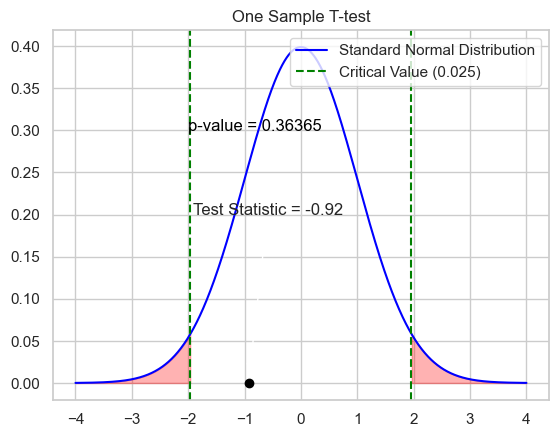

In [128]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Definindo os parâmetros
alpha = 0.05
alternative = 'two-sided'

# Parâmetros populacionais
population_mean = 70  # Média nacional relatada

# Estatísticas da amostra (supondo que 'df' seja o DataFrame com os dados)
sample = df['exam_score']
n = len(sample)
sample_mean = sample.mean()
sample_std = sample.std()

# Resultados do teste estatístico
test_statistic = -0.9169771399834613
p_value = 0.36364597032062806

# Função para concluir e visualizar os resultados
def conclusion_and_visualization(title, test_stat, p_val, alpha, alternative):
    # Calculando o valor crítico
    if alternative == 'two-sided':
        critical_value = stats.norm.ppf(1 - alpha/2)
    elif alternative == 'lower':
        critical_value = stats.norm.ppf(alpha)
    elif alternative == 'upper':
        critical_value = stats.norm.ppf(1 - alpha)
    
    # Plotando a distribuição normal padrão
    fig, ax = plt.subplots()
    x = np.linspace(-4, 4, 1000)
    ax.plot(x, stats.norm.pdf(x), label='Standard Normal Distribution', color='blue')
    
    # Destacando a área de rejeição
    ax.fill_between(x, 0, stats.norm.pdf(x), where=(x <= -critical_value), color='red', alpha=0.3)
    ax.fill_between(x, 0, stats.norm.pdf(x), where=(x >= critical_value), color='red', alpha=0.3)
    
    # Plotando o ponto do teste estatístico
    ax.scatter(test_stat, 0, color='black', zorder=5)
    ax.annotate(f'Test Statistic = {test_stat:.2f}', (test_stat, 0.01), xytext=(test_stat - 1, 0.2), 
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    
    # Linhas para o valor crítico
    ax.axvline(-critical_value, linestyle='--', color='green', label=f'Critical Value ({alpha/2})')
    ax.axvline(critical_value, linestyle='--', color='green')
    
    # Exibindo o valor p no gráfico
    ax.text(-2, 0.3, f'p-value = {p_val:.5f}', fontsize=12, color='black')
    
    # Configurações adicionais do gráfico
    ax.set_title(title)
    ax.legend(loc='upper right')
    
    plt.show()

# Chamando a função para concluir e visualizar os resultados
conclusion_and_visualization(
    title='One Sample T-test',
    test_stat=test_statistic,
    p_val=p_value,
    alpha=alpha,
    alternative=alternative
)


# 2.6 Conclusion Hyphotesis test 

Based on the statistical analysis conducted, there is insufficient evidence to reject the null hypothesis that the students' performance in the school does not differ significantly from the reported national average of 70%. Using a significance level of 0.05, the obtained p-value was 0.364, indicating that there is no statistically significant difference between the students' performance and the national average.

Furthermore, considering the school's average as 68, the result of the hypothesis test suggests that the students' performance is not statistically different from this local average. Therefore, with a confidence level of 95%, we can conclude that the students' performance appears to be in line with the local average.



In [129]:
# Realizar o teste de hipótese de uma amostra
resultado_teste = stats.ttest_1samp(df['exam_score'], popmean=media_nacional)

# Interpretar os resultados do teste
alfa = 0.05
p_valor = resultado_teste.pvalue
print("Valor de p:", p_valor)


Valor de p: 0.36364597032062806


# 3 - Task 2 - Diamonds

# 3.1 - Loading the file

In [130]:
dfd=pd.read_csv("diamonds.csv")

# 3.2 - Characterisation of the data set

In [131]:
dfd.head ()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [132]:
dfd.shape

(53940, 10)

In [133]:
dfd.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [134]:
dfd.describe ()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [135]:
dfd.describe(include="object")

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [136]:
dfd.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [137]:
dfd['colorless'] = dfd['color'].apply(lambda x: 1 if x in ['D', 'E', 'F'] else 0)

In [138]:
dfd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,colorless
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0


In [139]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   depth      53940 non-null  float64
 5   table      53940 non-null  float64
 6   price      53940 non-null  int64  
 7   x          53940 non-null  float64
 8   y          53940 non-null  float64
 9   z          53940 non-null  float64
 10  colorless  53940 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [140]:
dfd.isnull().sum().sum()

0

# 3.3 - Data Exploration

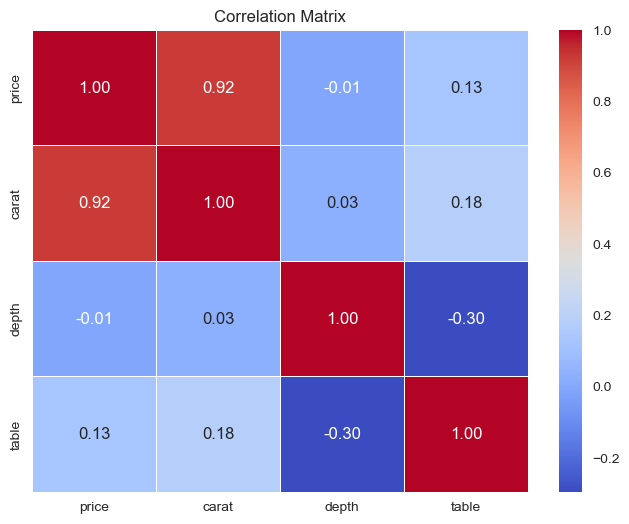

In [155]:
import seaborn as sns

# Select the numerical variables
numeric_variables = dfd[['price', 'carat', 'depth', 'table']]

# Calculate the correlation coefficients
correlation_matrix = numeric_variables.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


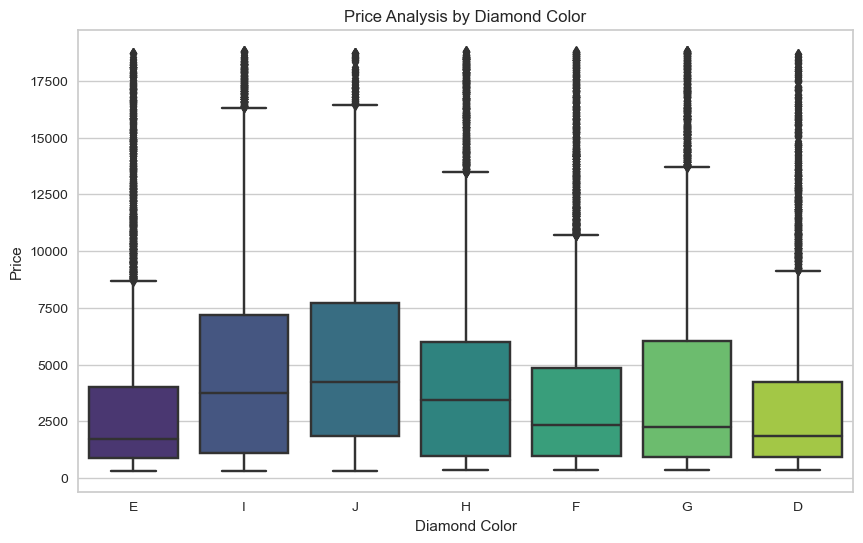

In [156]:
import seaborn as sns

# Create a boxplot to compare the average prices of diamonds by color
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=dfd, palette='viridis')
plt.title('Price Analysis by Diamond Color')
plt.xlabel('Diamond Color')
plt.ylabel('Price')
plt.show()


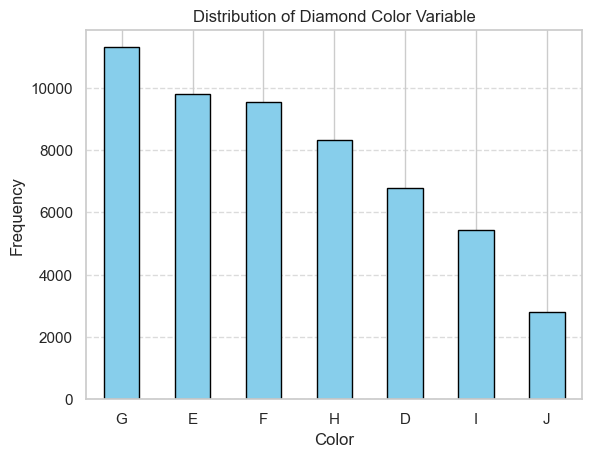

In [145]:
import matplotlib.pyplot as plt

# Analyze the distribution of the diamond color variable
cor_counts = dfd['color'].value_counts()

# Visualize the distribution using a bar plot
cor_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Diamond Color Variable')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Adjust the rotation of the x-axis label
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


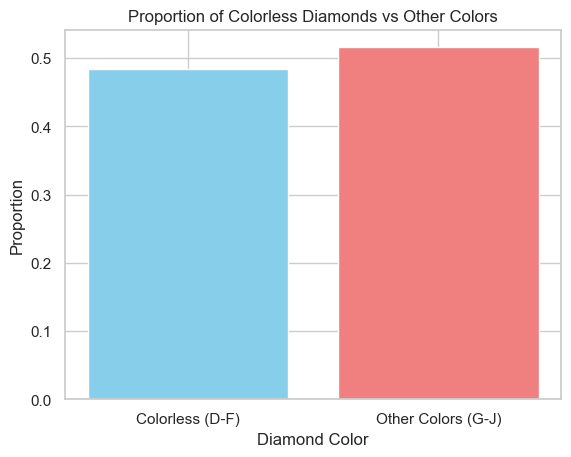

In [148]:
import matplotlib.pyplot as plt

# Calculate the proportion of colorless diamonds (D to F) and diamonds of other colors (G to J)
colorless_count = dfd[dfd['color'].isin(['D', 'E', 'F'])]['color'].count()
other_color_count = dfd[dfd['color'].isin(['G', 'H', 'I', 'J'])]['color'].count()

total_count = len(dfd)

# Calculate proportions
colorless_proportion = colorless_count / total_count
other_color_proportion = other_color_count / total_count

# Create a bar plot
labels = ['Colorless (D-F)', 'Other Colors (G-J)']
proportions = [colorless_proportion, other_color_proportion]
colors = ['skyblue', 'lightcoral']

plt.bar(labels, proportions, color=colors)
plt.title('Proportion of Colorless Diamonds vs Other Colors')
plt.xlabel('Diamond Color')
plt.ylabel('Proportion')
plt.show()


# 3.4 - Outliers 

<Axes: xlabel='colorless'>

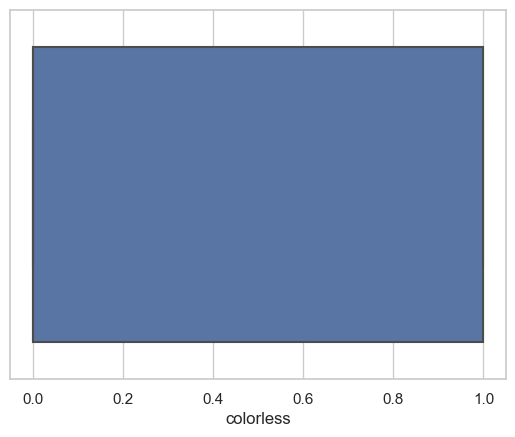

In [144]:
sns.boxplot(x=dfd["colorless"])

# 3.5 - Hypothesis Testing

In [160]:
from scipy.stats import chi2_contingency

# Create a contingency table between the variable "colourless" and the variable "clarity"
contingency_table = pd.crosstab(dfd['clarity'], dfd['colorless'])

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 486.47305941485223
p-value: 6.481587124454715e-101


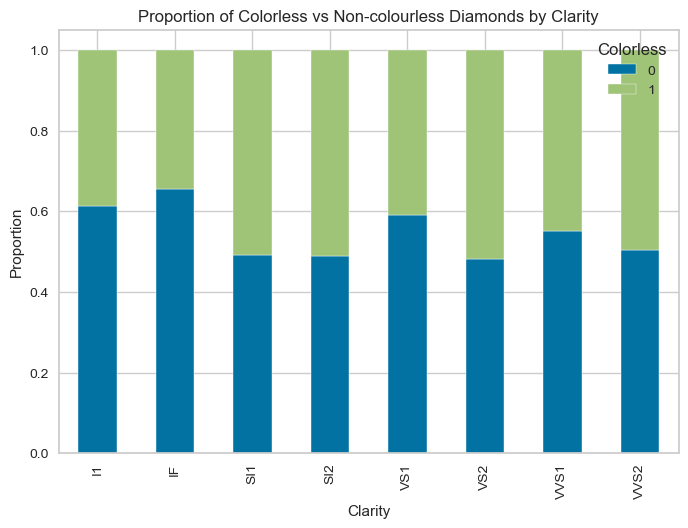

In [163]:


# Calculate the proportion of colorless and non-colorless diamonds for each clarity category
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot the bar plot
proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of Colorless vs Non-colourless Diamonds by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Proportion')
plt.legend(title='Colorless')
plt.show()


 Find and interpret 90% confidence intervals:

In [166]:
import scipy.stats as stats

# 90% confidence interval for the mean price of colorless diamonds
colorless_prices = dfd[dfd['colorless'] == 1]['price']
ci_colorless = stats.t.interval(0.90, len(colorless_prices)-1, loc=colorless_prices.mean(), scale=stats.sem(colorless_prices))
print("90% confidence interval for mean price of colorless diamonds:", ci_colorless)

# 90% confidence interval for the mean price of non-colorless diamonds
non_colorless_prices = dfd[dfd['colorless'] == 0]['price']
ci_non_colorless = stats.t.interval(0.90, len(non_colorless_prices)-1, loc=non_colorless_prices.mean(), scale=stats.sem(non_colorless_prices))
print("90% confidence interval for mean price of non-colorless diamonds:", ci_non_colorless)


90% confidence interval for mean price of colorless diamonds: (3301.857515879007, 3373.661286296071)
90% confidence interval for mean price of non-colorless diamonds: (4448.778068284649, 4533.682076903305)


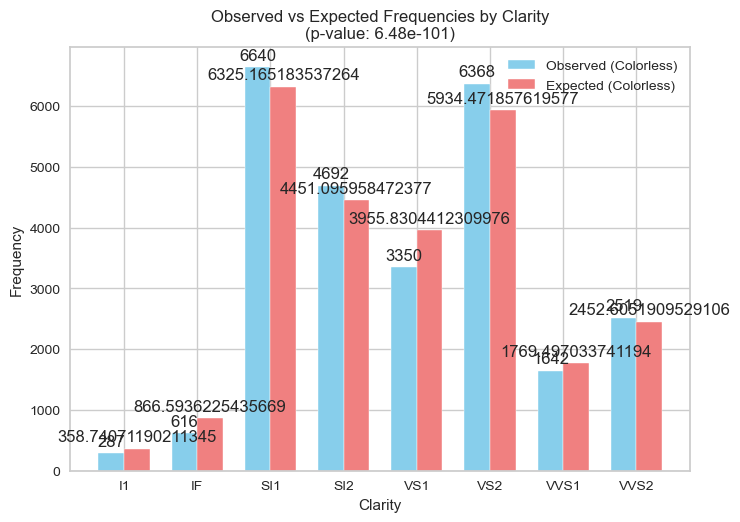

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular as frequências observadas e esperadas
observed = contingency_table.values
expected = expected

# Definir as posições das barras no eixo x
x = np.arange(len(contingency_table.index))

# Largura das barras
width = 0.35

# Plotar as barras
fig, ax = plt.subplots()
bars_observed = ax.bar(x - width/2, observed[:,1], width, label='Observed (Colorless)', color='skyblue')
bars_expected = ax.bar(x + width/2, expected[:,1], width, label='Expected (Colorless)', color='lightcoral')

# Adicionar as legendas
ax.set_xlabel('Clarity')
ax.set_ylabel('Frequency')
ax.set_title('Observed vs Expected Frequencies by Clarity\n(p-value: 6.48e-101)')
ax.set_xticks(x)
ax.set_xticklabels(contingency_table.index)
ax.legend()

# Rotular os valores das barras
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars_observed)
autolabel(bars_expected)

plt.show()



# 4 Task 3 - PlantGrowth

In [93]:
pip install pydataset

# 4.1 Loading the file

In [94]:
from pydataset import data 
df_plant = data("PlantGrowth")
df_trees = data("trees")

# 4.2 - Characterisation of the data set

In [184]:
df_plant.head ()

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [172]:
df_plant.shape 

(30, 2)

In [180]:
df_plant.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 720.0+ bytes


In [174]:
df_plant.describe ()

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [185]:
# Calculate descriptive statistics for the weight of plants in each group
summary_stats = df_plant.groupby('group')['weight'].describe()

# Display the result
print(summary_stats)


       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31


# 4.3 Data Exploration 

<Figure size 800x600 with 0 Axes>

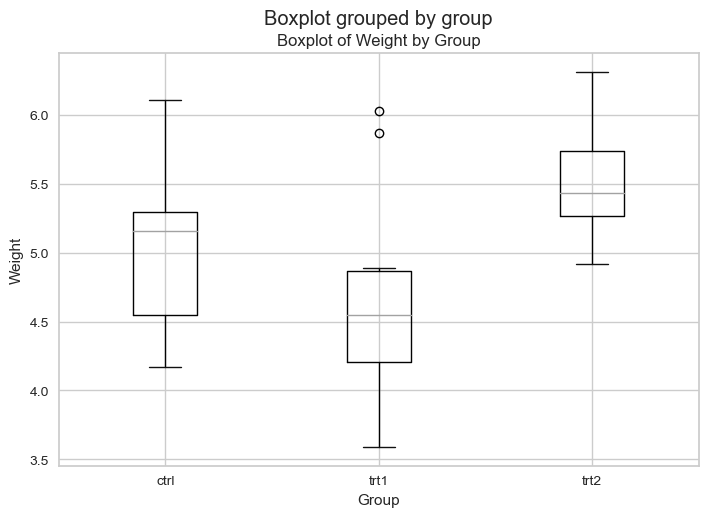

In [186]:
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(8, 6))
df_plant.boxplot(column='weight', by='group')
plt.title('Boxplot of Weight by Group')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.show()


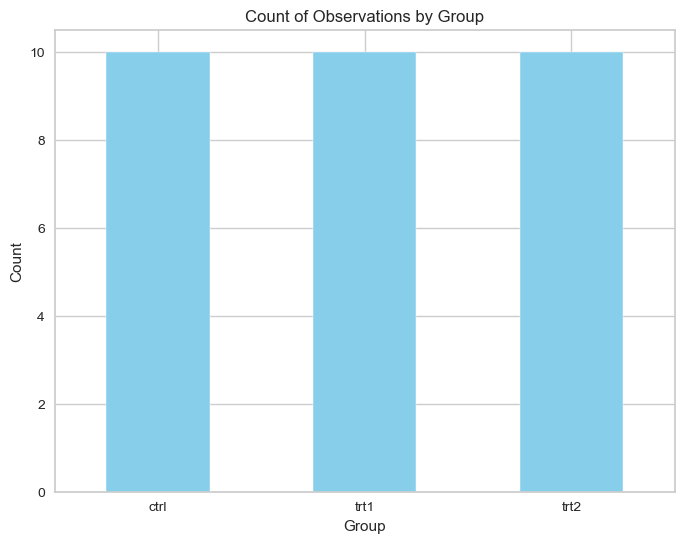

In [178]:
import matplotlib.pyplot as plt

# Contagem de observações em cada grupo
count_by_group = df_plant['group'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
count_by_group.plot(kind='bar', color='skyblue')
plt.title('Count of Observations by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Para manter os rótulos do grupo na horizontal
plt.show()



# 4.4 - Outliers 

<Axes: xlabel='weight'>

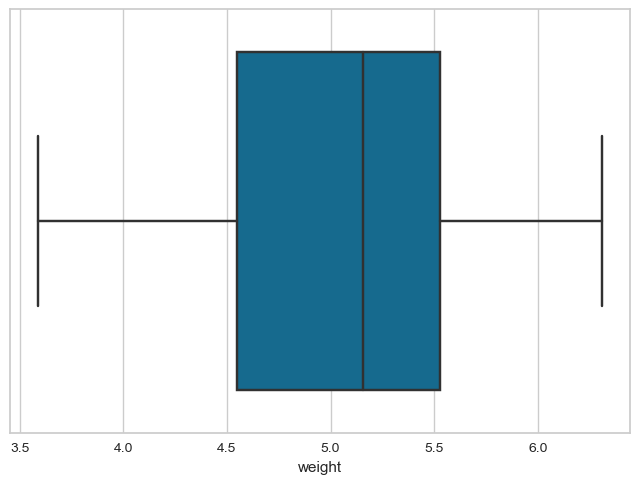

In [183]:
sns.boxplot(x=df_plant["weight"])

# 4.5 - Hypothesis Testing

In [187]:
from scipy.stats import f_oneway

# Separar os dados por grupo
group1 = df_plant[df_plant['group'] == 'ctrl']['weight']
group2 = df_plant[df_plant['group'] == 'trt1']['weight']
group3 = df_plant[df_plant['group'] == 'trt2']['weight']

# Realizar o teste de ANOVA
f_statistic, p_value = f_oneway(group1, group2, group3)

# Exibir o resultado
print("F-statistic:", f_statistic)
print("p-value:", p_value)


F-statistic: 4.846087862380136
p-value: 0.0159099583256229


C:\Users\Ana Paula Damasceno\AppData\Local\Temp\ipykernel_5736\1255606740.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='group', y='weight', data=df_plant, ci='sd', capsize=0.1, palette='Blues')


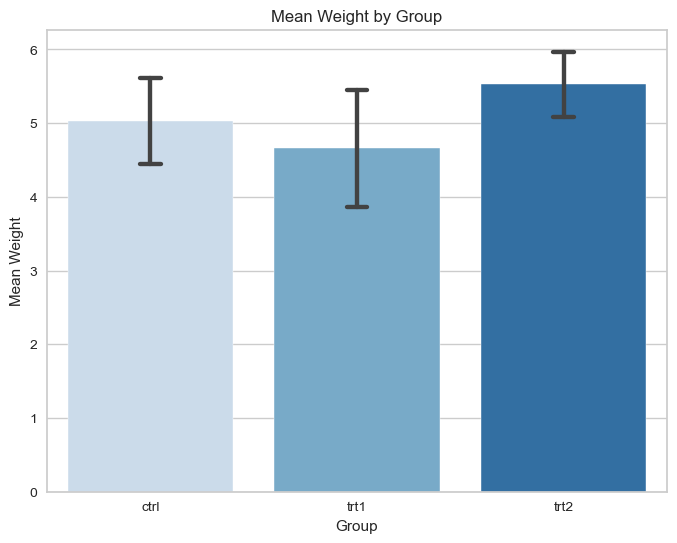

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar o gráfico de barras com intervalos de confiança
plt.figure(figsize=(8, 6))
sns.barplot(x='group', y='weight', data=df_plant, ci='sd', capsize=0.1, palette='Blues')
plt.title('Mean Weight by Group')
plt.xlabel('Group')
plt.ylabel('Mean Weight')
plt.show()


# 5 - Task 4 - Trees

In [96]:
df_trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


In [97]:
df_trees.shape

(31, 3)

In [98]:
df_trees.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 992.0 bytes


In [99]:
df_trees.describe ()

,Girth,Height,Volume
count,31.000000,31.000000,31.000000
mean,13.248387,76.000000,30.170968
std,3.138139,6.371813,16.437846
min,8.300000,63.000000,10.200000
25%,11.050000,72.000000,19.400000
50%,12.900000,76.000000,24.200000
75%,15.250000,80.000000,37.300000
max,20.600000,87.000000,77.000000
